## Pre EDA of the dataset

**Abstract:**

This report analyzes a dataset comprising energy consumption metrics from various buildings over a period of time. The dataset includes features such as building ID, campus ID, timestamp, consumption, current, voltage, power, and power factor. Two main aspects are explored in this analysis: general trends and unexpected patterns in energy consumption.

**Introduction:**

Understanding energy consumption patterns is crucial for efficient resource management and sustainability. This analysis aims to uncover both expected trends and anomalies in energy usage, contributing to better-informed decision-making and resource allocation in communities and buildings.

**Related Work:**

Previous research in energy analytics has focused on various techniques to analyze and predict energy consumption patterns. Time series analysis, machine learning algorithms, and anomaly detection methods have been applied to understand and optimize energy usage in different contexts.

**Data Analysis 1: General Trend and Pattern**

The first aspect of analysis focuses on identifying general trends and patterns in energy consumption across the dataset. This includes examining the overall consumption levels, variations based on timestamps, and correlations between different metrics such as voltage, current, and power.

*Understanding the Expected Patterns or Trends:*

The analysis reveals typical energy consumption patterns, such as fluctuations based on time of day, weekdays versus weekends, and seasonal variations. These trends align with expectations, demonstrating higher consumption during peak hours and differences between weekdays and weekends.

**Data Analysis 2: Unexpected Patterns and Anomalies**

The second aspect delves into unexpected patterns, anomalies, and deviations from the expected consumption trends. This involves identifying unusual spikes or dips in energy usage, irregular patterns that do not follow typical trends, and potential outliers.

*Understanding the Unexpected Patterns or Trends and Its Support:*

The analysis uncovers anomalies such as sudden spikes or drops in consumption that are not explainable by normal usage patterns. These anomalies could indicate equipment malfunctions, operational inefficiencies, or external factors impacting energy usage. Further investigation and correlation analysis are needed to understand the underlying causes of these anomalies.

**Discussion/Comment:**

Based on the observations from the data analysis, it is suggested that implementing real-time monitoring and anomaly detection systems can help identify and address unexpected energy consumption patterns promptly. This proactive approach can lead to improved energy efficiency, cost savings, and reduced environmental impact.

**Conclusions:**

In conclusion, this analysis highlights both expected trends and unexpected anomalies in energy consumption patterns. By leveraging data analytics techniques, stakeholders can make informed decisions to optimize energy usage, enhance sustainability efforts, and contribute positively to the community and environment.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [23]:
df = pd.read_csv('../Final_dataset/building_submeter_consumption.csv')
df

,building_id,id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95


In [24]:
# Display the first few rows of the DataFrame
print(df.head())

   building_id  id  campus_id                  timestamp  consumption  \
0         14.0   1        2.0  2021-04-20 19:05:00+10:00       0.2256   
1         14.0   1        2.0  2021-04-20 19:10:00+10:00       0.2010   
2         14.0   1        2.0  2021-04-20 19:15:00+10:00       0.2440   
3         14.0   1        2.0  2021-04-20 19:20:00+10:00       0.1886   
4         14.0   1        2.0  2021-04-20 19:25:00+10:00       0.2501   

   current  voltage   power  power_factor  
0     3.96    240.0  2.7073          0.95  
1     3.53    240.0  2.4118          0.95  
2     4.28    240.0  2.9284          0.95  
3     3.31    240.0  2.2636          0.95  
4     4.39    240.0  3.0009          0.95  


In [25]:
# Summary statistics
print(df.describe())

        building_id            id     campus_id   consumption       current  \
count  1.312464e+06  1.665162e+06  1.312464e+06  1.665162e+06  1.665162e+06   
mean   3.195293e+01  5.719922e+00  1.384846e+00  9.463271e-01  1.776316e+01   
std    1.702052e+01  2.812046e+00  4.865592e-01  8.686793e-01  1.533402e+01   
min    1.300000e+01  1.000000e+00  1.000000e+00  9.600000e-03  1.700000e-01   
25%    1.400000e+01  3.000000e+00  1.000000e+00  2.670000e-01  5.040000e+00   
50%    3.900000e+01  6.000000e+00  1.000000e+00  9.647000e-01  1.867000e+01   
75%    3.900000e+01  8.000000e+00  2.000000e+00  1.302100e+00  2.420000e+01   
max    6.200000e+01  1.000000e+01  2.000000e+00  7.736200e+00  1.357200e+02   

            voltage         power  power_factor  
count  1.665162e+06  1.665162e+06  1.665162e+06  
mean   2.362894e+02  1.135593e+01  9.500000e-01  
std    4.647608e+00  1.042415e+01  2.553514e-15  
min    2.300000e+02  1.149000e-01  9.500000e-01  
25%    2.300000e+02  3.204500e+00  9.5

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665162 entries, 0 to 1665161
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   building_id   1312464 non-null  float64
 1   id            1665162 non-null  int64  
 2   campus_id     1312464 non-null  float64
 3   timestamp     1665162 non-null  object 
 4   consumption   1665162 non-null  float64
 5   current       1665162 non-null  float64
 6   voltage       1665162 non-null  float64
 7   power         1665162 non-null  float64
 8   power_factor  1665162 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 114.3+ MB


In [27]:
df.nunique()


building_id          5
id                  10
campus_id            2
timestamp       242257
consumption      52277
current          12376
voltage              8
power           230267
power_factor         1
dtype: int64

In [28]:
(df.isnull().sum()/(len(df)))*100


building_id     21.181002
id               0.000000
campus_id       21.181002
timestamp        0.000000
consumption      0.000000
current          0.000000
voltage          0.000000
power            0.000000
power_factor     0.000000
dtype: float64

In [29]:
df.isnull().sum()


building_id     352698
id                   0
campus_id       352698
timestamp            0
consumption          0
current              0
voltage              0
power                0
power_factor         0
dtype: int64

### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [30]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
building_id,1312464.0,31.952928,1.702052e+01,13.0000,14.0000,39.0000,39.0000,62.0000
id,1665162.0,5.719922,2.812046e+00,1.0000,3.0000,6.0000,8.0000,10.0000
campus_id,1312464.0,1.384846,4.865592e-01,1.0000,1.0000,1.0000,2.0000,2.0000
consumption,1665162.0,0.946327,8.686793e-01,0.0096,0.2670,0.9647,1.3021,7.7362
current,1665162.0,17.763157,1.533402e+01,0.1700,5.0400,18.6700,24.2000,135.7200
voltage,1665162.0,236.289410,4.647608e+00,230.0000,230.0000,240.0000,240.0000,240.0000
power,1665162.0,11.355930,1.042415e+01,0.1149,3.2045,11.5766,15.6251,92.8338
power_factor,1665162.0,0.950000,2.553514e-15,0.9500,0.9500,0.9500,0.9500,0.9500


In [31]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
building_id,1312464.0,NaN,NaN,NaN,31.952928,17.020524,13.0,14.0,39.0,39.0,62.0
id,1665162.0,NaN,NaN,NaN,5.719922,2.812046,1.0,3.0,6.0,8.0,10.0
campus_id,1312464.0,NaN,NaN,NaN,1.384846,0.486559,1.0,1.0,1.0,2.0,2.0
timestamp,1665162,242257,2021-04-20 19:05:00+10:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumption,1665162.0,NaN,NaN,NaN,0.946327,0.868679,0.0096,0.267,0.9647,1.3021,7.7362
current,1665162.0,NaN,NaN,NaN,17.763157,15.334022,0.17,5.04,18.67,24.2,135.72
voltage,1665162.0,NaN,NaN,NaN,236.28941,4.647608,230.0,230.0,240.0,240.0,240.0
power,1665162.0,NaN,NaN,NaN,11.35593,10.424151,0.1149,3.2045,11.5766,15.6251,92.8338
power_factor,1665162.0,NaN,NaN,NaN,0.95,0.0,0.95,0.95,0.95,0.95,0.95


In [32]:
df = df.dropna()
df

,building_id,id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95


In [33]:
df.isnull().sum()


building_id     0
id              0
campus_id       0
timestamp       0
consumption     0
current         0
voltage         0
power           0
power_factor    0
dtype: int64

In [34]:
# Remove id column from data
df = df.drop(['id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312464 entries, 0 to 1665161
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   building_id   1312464 non-null  float64
 1   campus_id     1312464 non-null  float64
 2   timestamp     1312464 non-null  object 
 3   consumption   1312464 non-null  float64
 4   current       1312464 non-null  float64
 5   voltage       1312464 non-null  float64
 6   power         1312464 non-null  float64
 7   power_factor  1312464 non-null  float64
dtypes: float64(7), object(1)
memory usage: 90.1+ MB


### Time Range:

Determine the time range of the dataset (from the earliest to the latest timestamp).

In [35]:
# Time Range
print("\nTime Range:")
print("Earliest Timestamp:", df['timestamp'].min())
print("Latest Timestamp:", df['timestamp'].max())


Time Range:
Earliest Timestamp: 2019-08-15 13:50:00+10:00
Latest Timestamp: 2022-07-13 08:55:00+10:00


### EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

C:\Users\Ibtasam Ahmad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x1700 with 0 Axes>

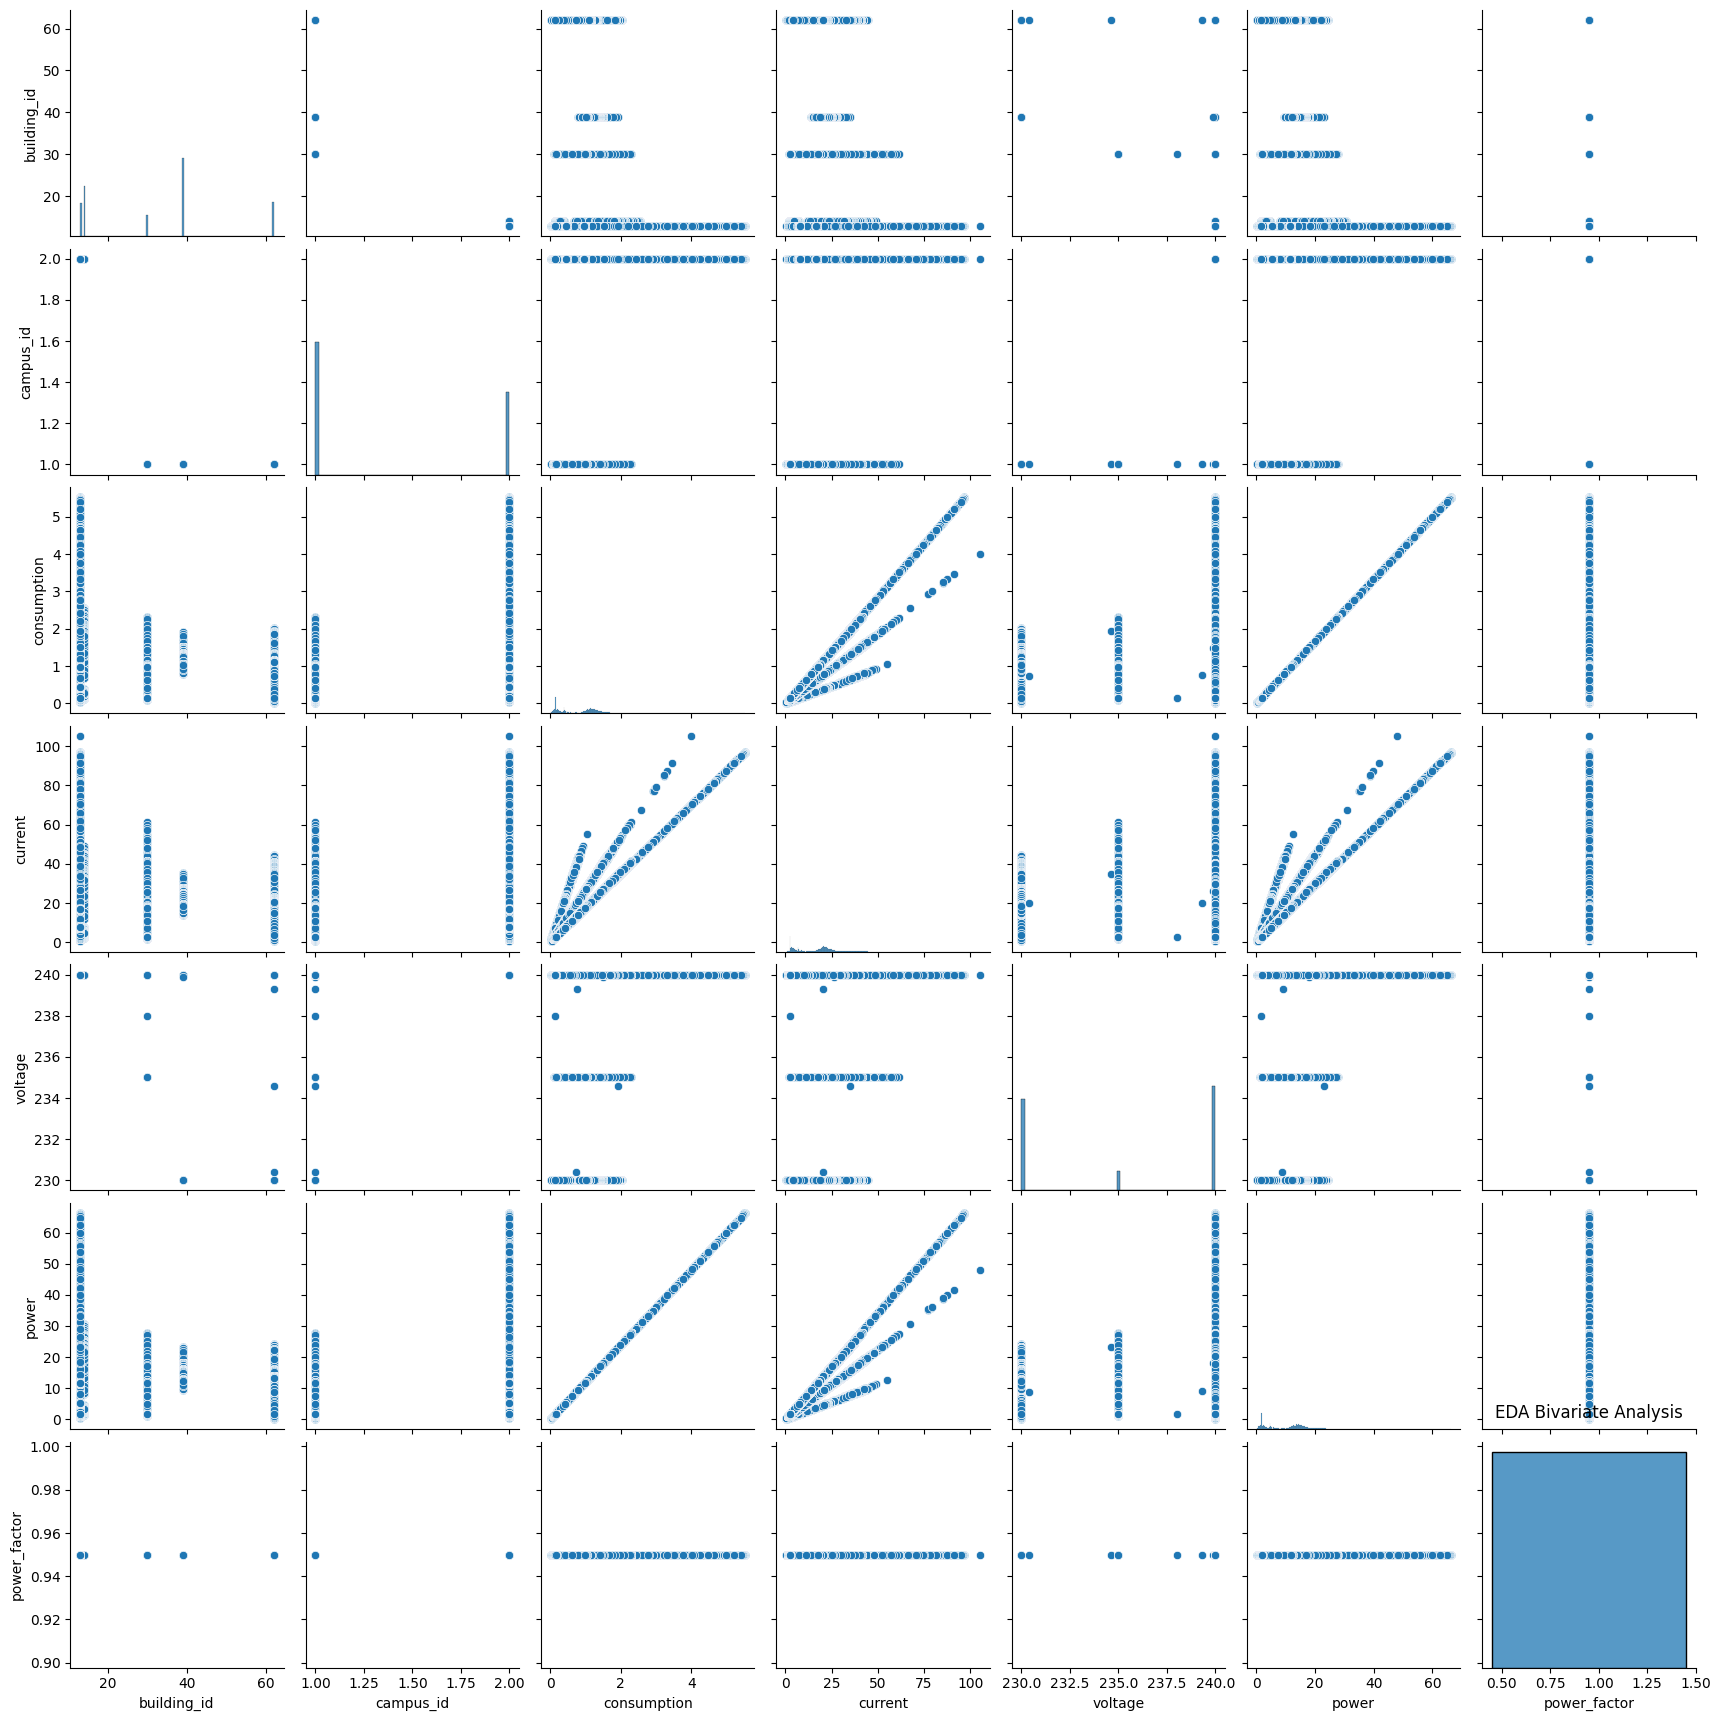

In [39]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['timestamp'],axis=1))
plt.title('EDA Bivariate Analysis')
plt.show()

### EDA Multivariate Analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

##### A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

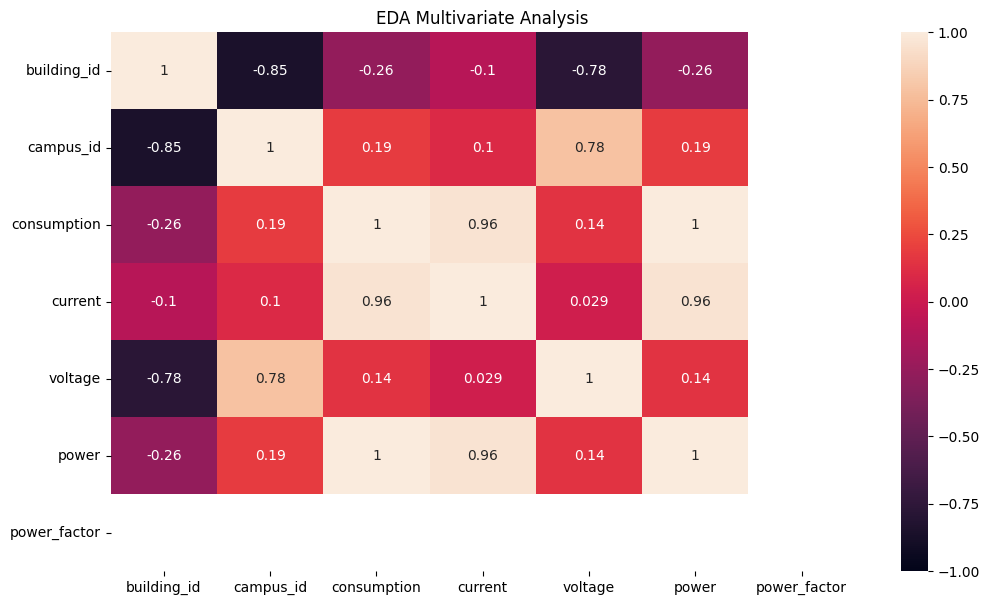

In [40]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['timestamp'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.title('EDA Multivariate Analysis')
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

### Distribution of Consumption:

Plot a histogram or density plot to visualize the distribution of consumption.
Calculate summary statistics such as mean, median, standard deviation, min, max, etc., for consumption.

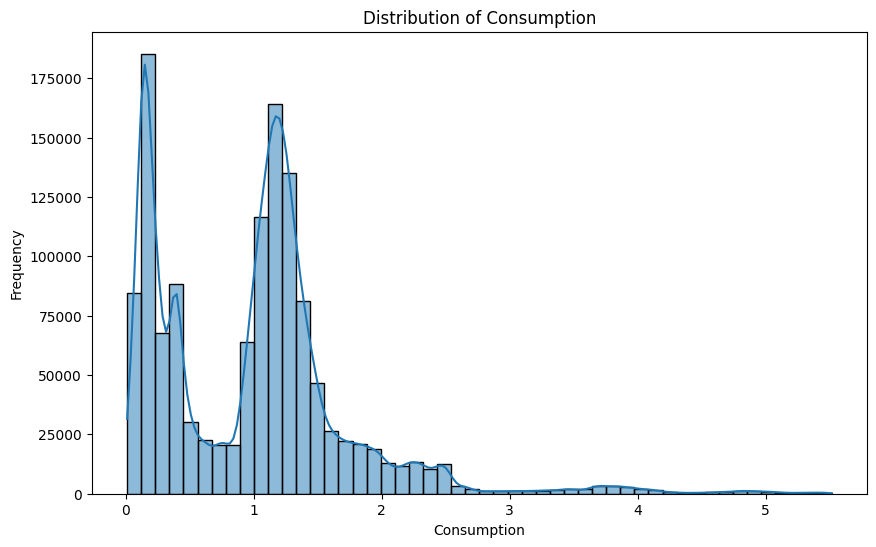

In [41]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['consumption'], bins=50, kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

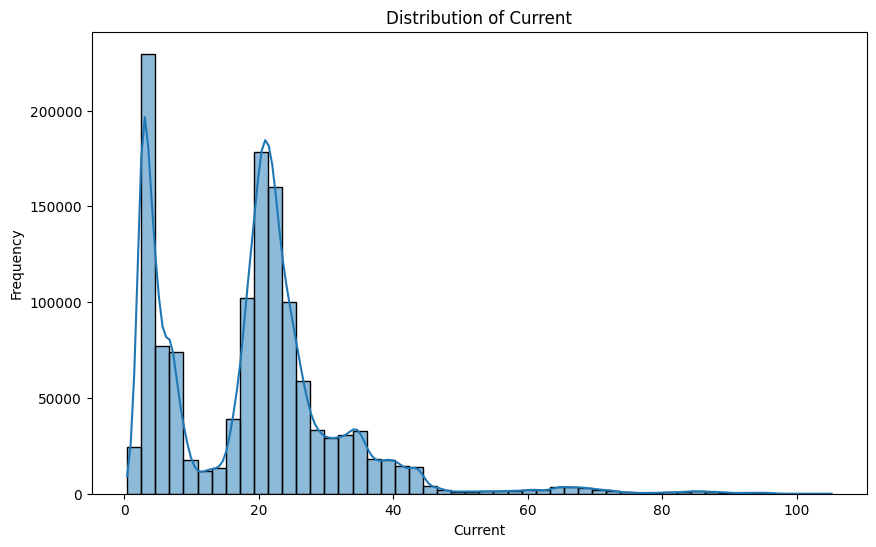

In [43]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['current'], bins=50, kde=True)
plt.title('Distribution of Current')
plt.xlabel('Current')
plt.ylabel('Frequency')
plt.show()

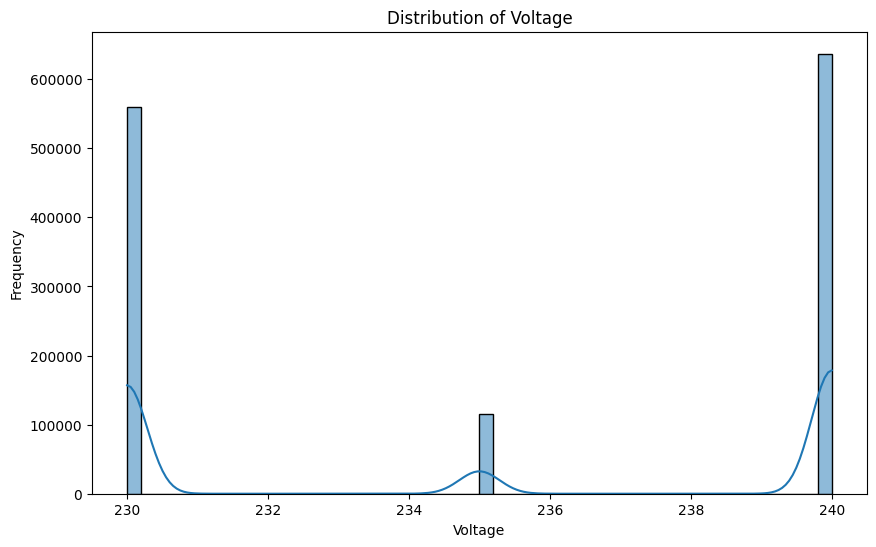

In [44]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['voltage'], bins=50, kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.show()

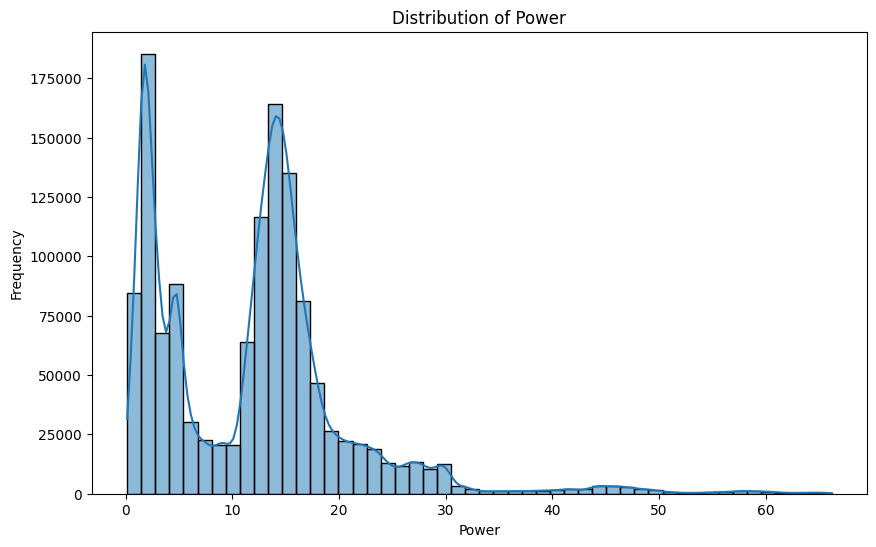

In [45]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['power'], bins=50, kde=True)
plt.title('Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

In [46]:
print("\nSummary Statistics for Consumption:")
print(df['consumption'].describe())


Summary Statistics for Consumption:
count    1.312464e+06
mean     9.982372e-01
std      7.579934e-01
min      1.240000e-02
25%      3.118000e-01
50%      1.073600e+00
75%      1.318000e+00
max      5.516400e+00
Name: consumption, dtype: float64


In [47]:
print("\nSummary Statistics for Consumption:")
print(df['current'].describe())


Summary Statistics for Consumption:
count    1.312464e+06
mean     1.898432e+01
std      1.331604e+01
min      4.100000e-01
25%      6.570000e+00
50%      2.016000e+01
75%      2.454000e+01
max      1.051900e+02
Name: current, dtype: float64


In [48]:
print("\nSummary Statistics for Consumption:")
print(df['voltage'].describe())


Summary Statistics for Consumption:
count    1.312464e+06
mean     2.352923e+02
std      4.765563e+00
min      2.300000e+02
25%      2.300000e+02
50%      2.350000e+02
75%      2.400000e+02
max      2.400000e+02
Name: voltage, dtype: float64


In [49]:
print("\nSummary Statistics for Consumption:")
print(df['power'].describe())


Summary Statistics for Consumption:
count    1.312464e+06
mean     1.197885e+01
std      9.095921e+00
min      1.484000e-01
25%      3.742000e+00
50%      1.288315e+01
75%      1.581550e+01
max      6.619710e+01
Name: power, dtype: float64


### Consumption Trends Over Time:

Plot a time series graph of consumption over the entire time range.
Analyze any noticeable trends, seasonality, or patterns in the consumption data.

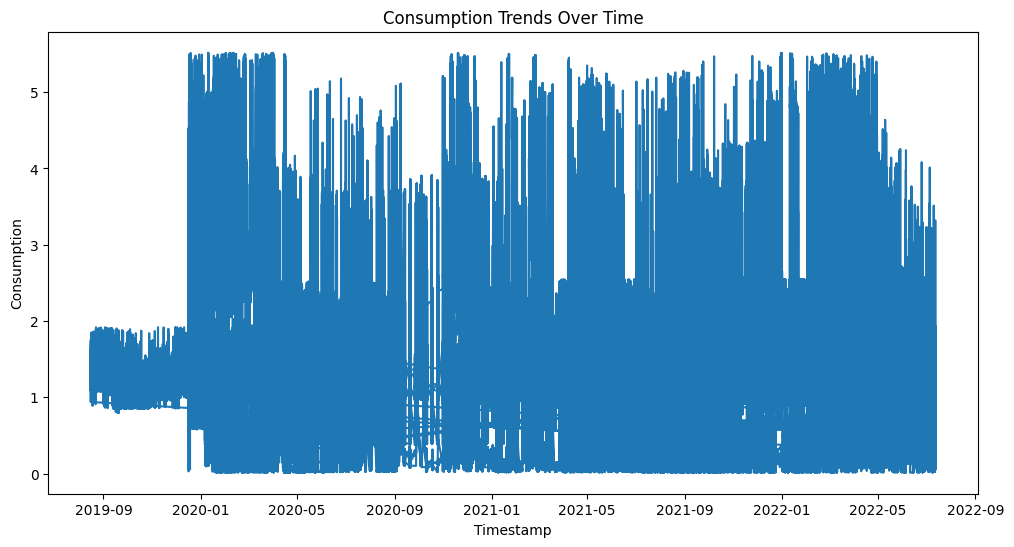

In [50]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['consumption'])
plt.title('Consumption Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.show()

### Temporal Analysis:

Analyze consumption patterns based on different time intervals (e.g., hourly, daily, weekly).
Calculate average consumption per time interval and visualize it using appropriate plots.

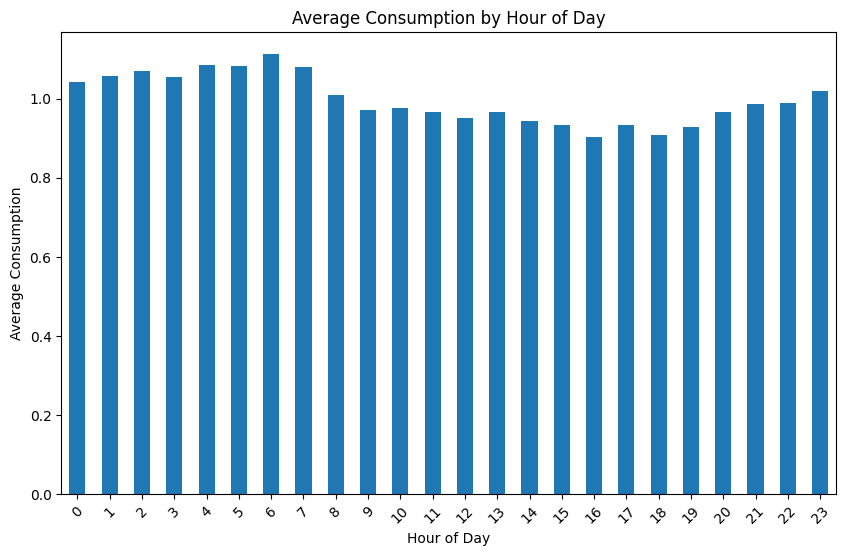

In [58]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['consumption'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

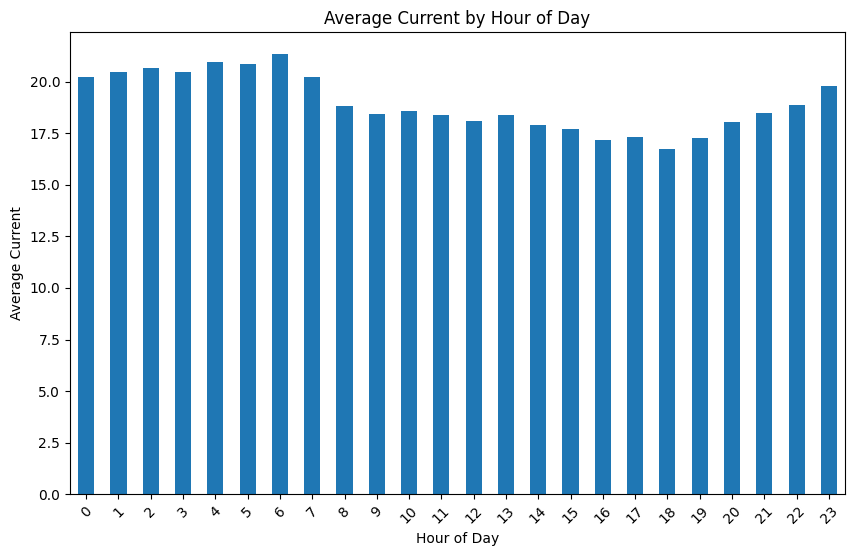

In [60]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['current'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Current by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Current')
plt.xticks(rotation=45)
plt.show()

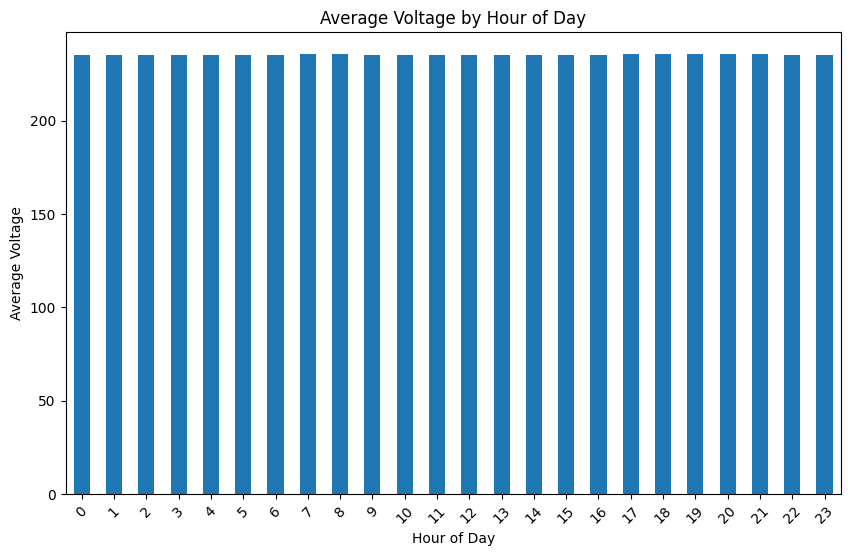

In [61]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['voltage'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Voltage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Voltage')
plt.xticks(rotation=45)
plt.show()

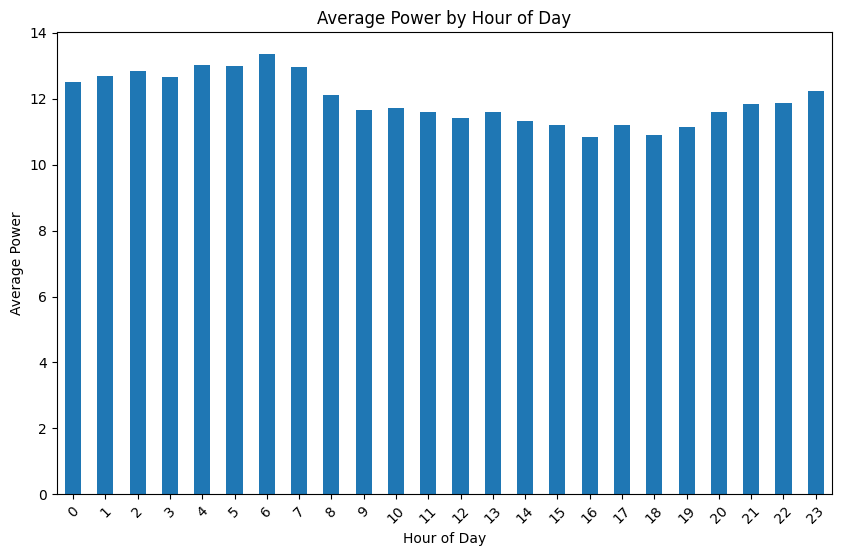

In [62]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['power'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power')
plt.xticks(rotation=45)
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

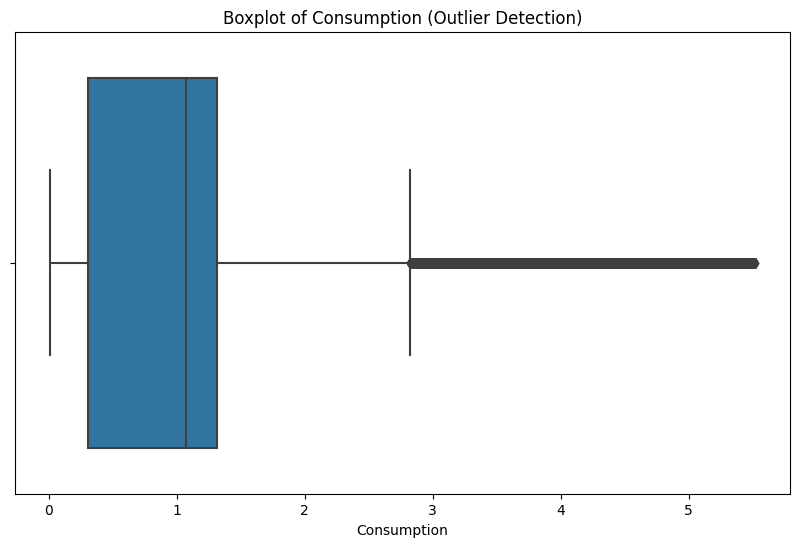

In [63]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['consumption'])
plt.title('Boxplot of Consumption (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

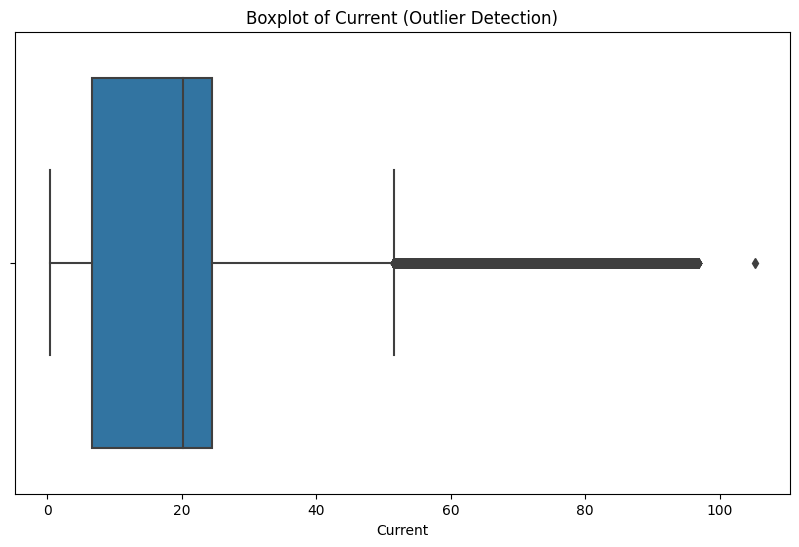

In [65]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['current'])
plt.title('Boxplot of Current (Outlier Detection)')
plt.xlabel('Current')
plt.show()

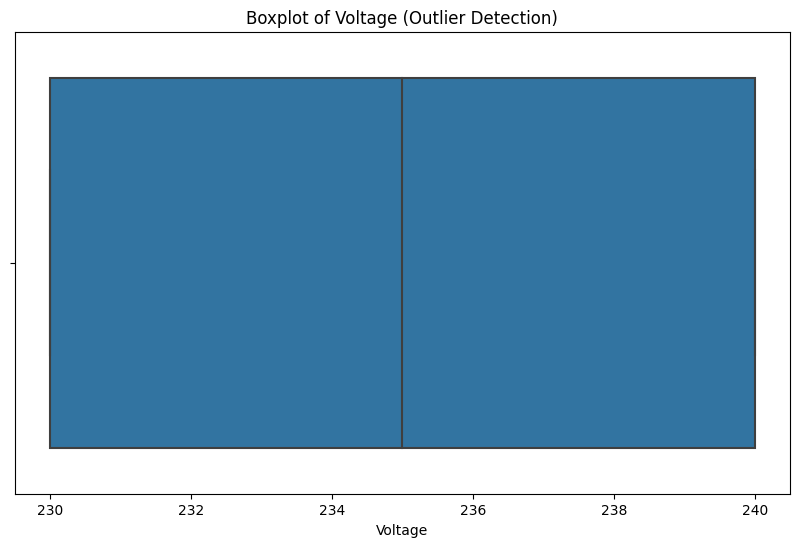

In [66]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['voltage'])
plt.title('Boxplot of Voltage (Outlier Detection)')
plt.xlabel('Voltage')
plt.show()

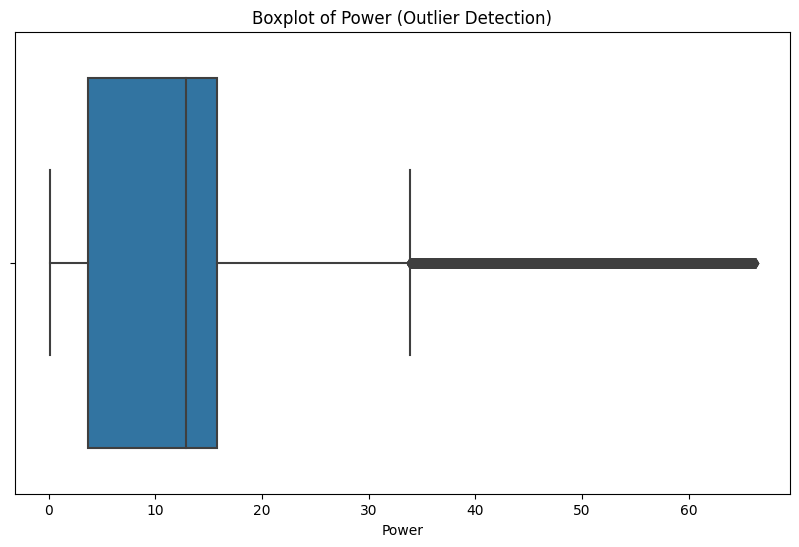

In [67]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['power'])
plt.title('Boxplot of Power (Outlier Detection)')
plt.xlabel('Power')
plt.show()

### Correlation Analysis:

Check for correlations between meter_id, timestamp, and consumption.
Visualize correlations using a heatmap or correlation matrix.

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_7912\3322742227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


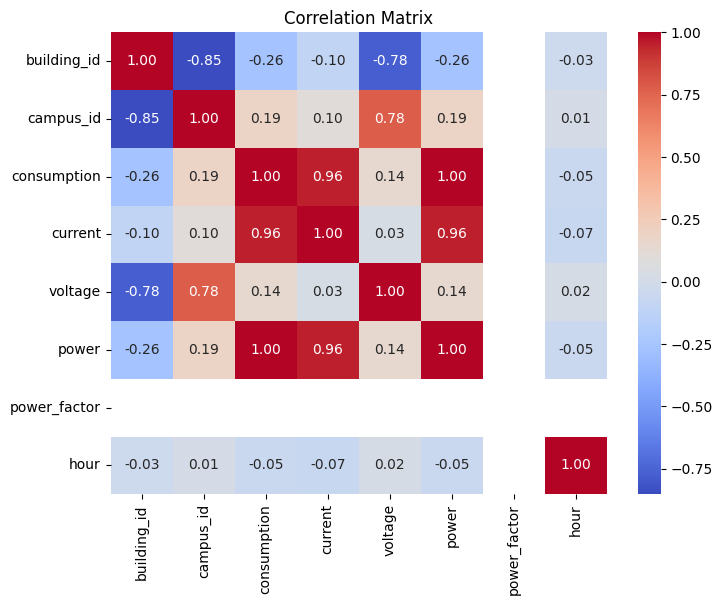

In [68]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Seasonal Decomposition:

Perform seasonal decomposition (e.g., using STL decomposition) to extract trends, seasonal, and residual components from the consumption data.

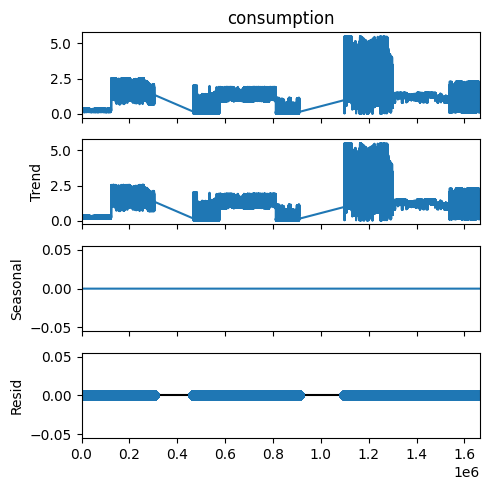

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['consumption'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

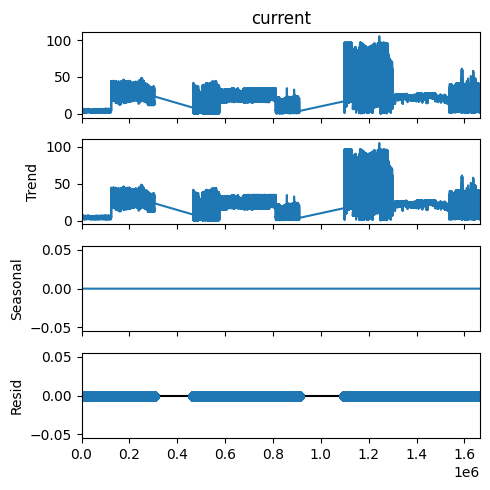

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['current'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

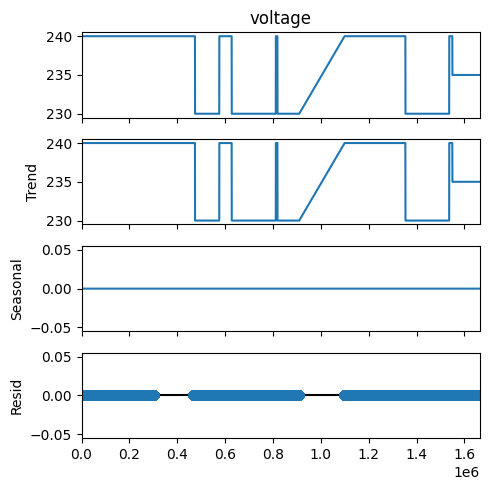

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['voltage'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

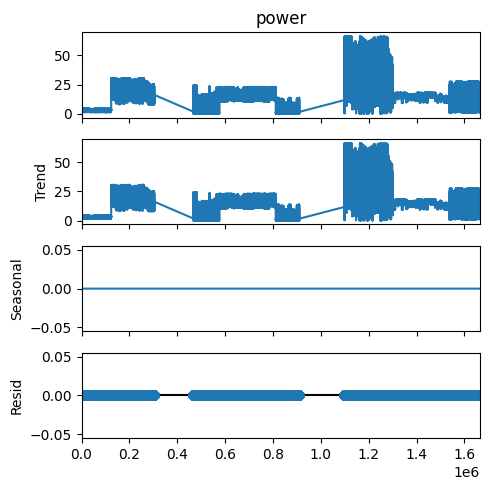

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['power'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

### Data Quality Check:

Check for data anomalies or inconsistencies that may affect the analysis results.
Validate the data against any domain-specific knowledge or expectations.

In [74]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

# Check for negative consumption values
negative_consumption = df[df['consumption'] < 0]
if negative_consumption.empty:
    print("No negative consumption values found.")
else:
    print("Negative consumption values found.")
    print(negative_consumption)

# Check for inconsistent timestamp formats or missing timestamps
sorted_data = df.sort_values(by='timestamp')
time_diff = sorted_data['timestamp'].diff().dropna()
if (time_diff.dt.total_seconds() > 900).any():
    print("Timestamps are not consistently spaced (greater than 15 minutes apart).")
else:
    print("Timestamps are consistently spaced (15 minutes apart).")

Duplicate rows found.
         building_id  campus_id                 timestamp  consumption  \
815901          62.0        1.0 2020-02-09 01:45:00+00:00       0.0860   
820727          62.0        1.0 2020-03-01 10:05:00+00:00       0.0566   
1339821         39.0        1.0 2020-01-04 02:20:00+00:00       1.3544   
1366865         39.0        1.0 2020-04-22 02:45:00+00:00       1.3267   
1428759         39.0        1.0 2021-06-12 05:10:00+00:00       1.1890   

         current  voltage    power  power_factor  hour  
815901      2.26    240.0   1.0315          0.95     1  
820727      3.11    230.0   0.6787          0.95    10  
1339821    23.76    240.0  16.2528          0.95     2  
1366865    24.29    230.0  15.9203          0.95     2  
1428759    21.77    230.0  14.2681          0.95     5  
No negative consumption values found.
Timestamps are not consistently spaced (greater than 15 minutes apart).


### Feature Engineering:

Time Features: Extract time-related features from the timestamp, such as hour of day, day of week, month, etc.
Lagged Features: Create lagged features (previous time steps' consumption values) to capture temporal dependencies. 

In [75]:
# Assuming 'data' is your dataframe with the timestamp column converted to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [76]:
# Time Features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Lagged Features (e.g., lagged consumption values)
num_lags = 3  # You can adjust the number of lagged features
for lag in range(1, num_lags + 1):
    df[f'lag_{lag}'] = df['consumption'].shift(lag)

### Feature Taregt

In [77]:
# Drop rows with NaN values due to lagging
df.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = df.drop(['timestamp', 'consumption', 'current', 'voltage'], axis=1)
y = df['consumption']

print(X, y)

         building_id  campus_id   power  power_factor  hour  day_of_week  \
3               14.0        2.0  2.2636          0.95     9            1   
4               14.0        2.0  3.0009          0.95     9            1   
5               14.0        2.0  2.4191          0.95     9            1   
6               14.0        2.0  2.3922          0.95     9            1   
7               14.0        2.0  2.4699          0.95     9            1   
...              ...        ...     ...           ...   ...          ...   
1665157         30.0        1.0  1.7811          0.95     0            0   
1665158         30.0        1.0  1.7757          0.95     0            0   
1665159         30.0        1.0  1.7802          0.95     0            0   
1665160         30.0        1.0  1.7789          0.95     0            0   
1665161         30.0        1.0  1.7918          0.95     0            0   

         month  year   lag_1   lag_2   lag_3  
3            4  2021  0.2440  0.2010  0.

### Impute Missing Values

In [78]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

### Train Test Split

In [79]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Creation

Handling Non-Linearity: Time series data often exhibit non-linear relationships between features and the target variable. Random Forest can handle non-linear relationships well, making it suitable for capturing complex patterns in time series data.

Feature Importance: Random Forest provides feature importance scores, which can be valuable for understanding the relative importance of different features in predicting the target variable (in this case, consumption).

Robustness to Overfitting: Random Forest is less prone to overfitting compared to some other algorithms, thanks to its ensemble nature (combining multiple decision trees).

Ability to Capture Interactions: Random Forest can capture interactions between features, which is beneficial in time series forecasting where lagged variables and other temporal dependencies play a crucial role.

Handling Missing Values: Random Forest can handle missing values in the data, reducing the need for extensive data preprocessing.

In [81]:
# Model creation (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed
model.fit(X_train.iloc[:100000], y_train.iloc[:100000])  # remove iloc for all thr data

RandomForestRegressor(random_state=42)

### Model Evaluation

In [82]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.7718165665371595e-08


### Single Feature Graph

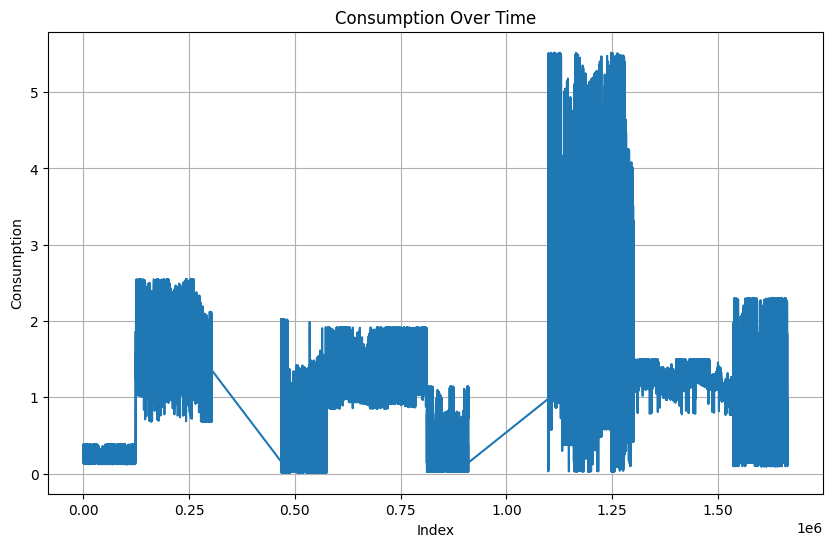

In [83]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['consumption'])
plt.title('Consumption Over Time')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.grid(True)  # Add grid lines for better readability
plt.show()

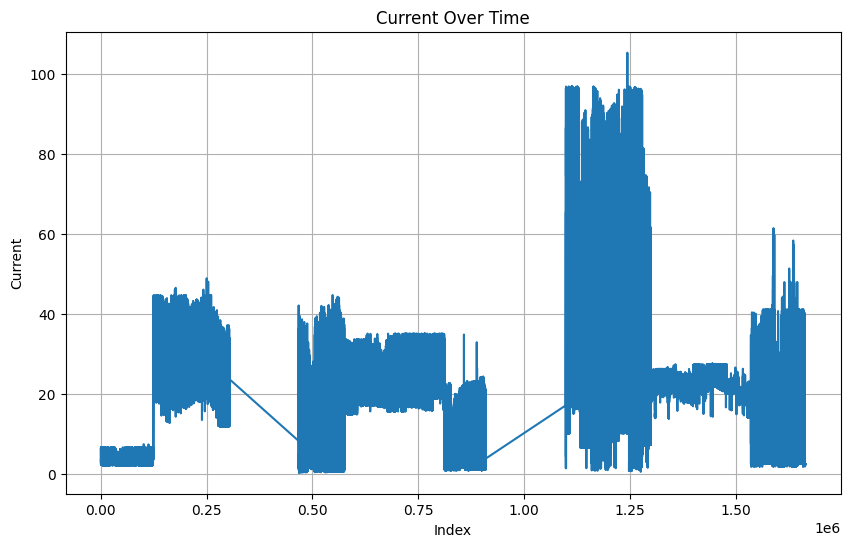

In [84]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['current'])
plt.title('Current Over Time')
plt.xlabel('Index')
plt.ylabel('Current')
plt.grid(True)  # Add grid lines for better readability
plt.show()

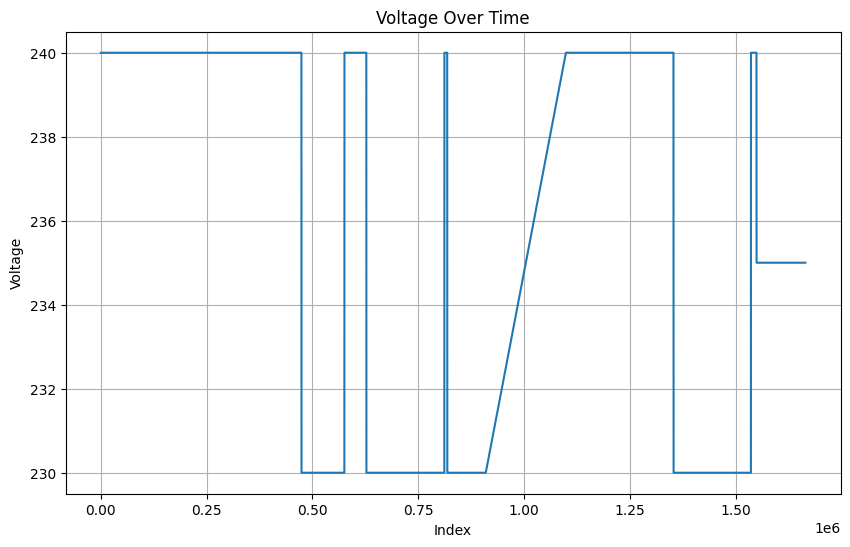

In [85]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['voltage'])
plt.title('Voltage Over Time')
plt.xlabel('Index')
plt.ylabel('Voltage')
plt.grid(True)  # Add grid lines for better readability
plt.show()

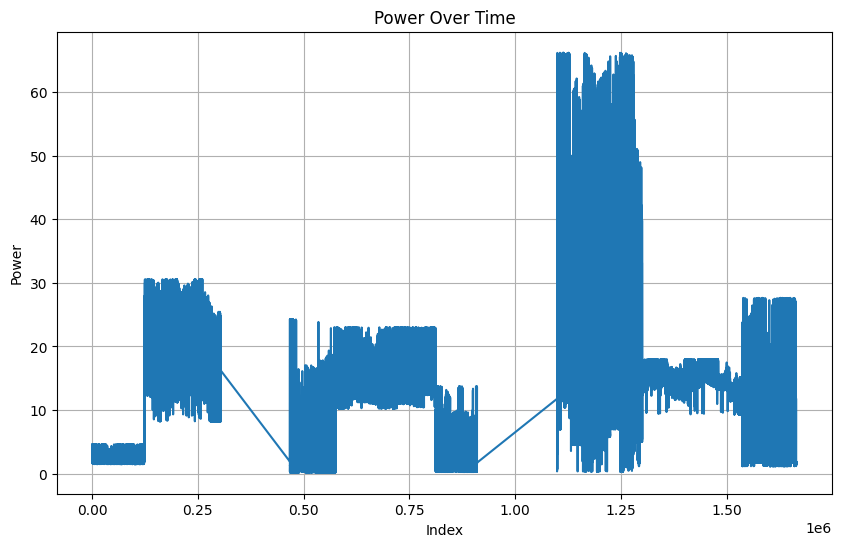

In [86]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['power'])
plt.title('Power Over Time')
plt.xlabel('Index')
plt.ylabel('Power')
plt.grid(True)  # Add grid lines for better readability
plt.show()

### Cluster Analysis

In [87]:
df.columns

Index(['building_id', 'campus_id', 'timestamp', 'consumption', 'current',
       'voltage', 'power', 'power_factor', 'hour', 'day_of_week', 'month',
       'year', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')

In [88]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['consumption', 'current',
       'voltage', 'power']
X = df[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_


c:\Users\Ibtasam Ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


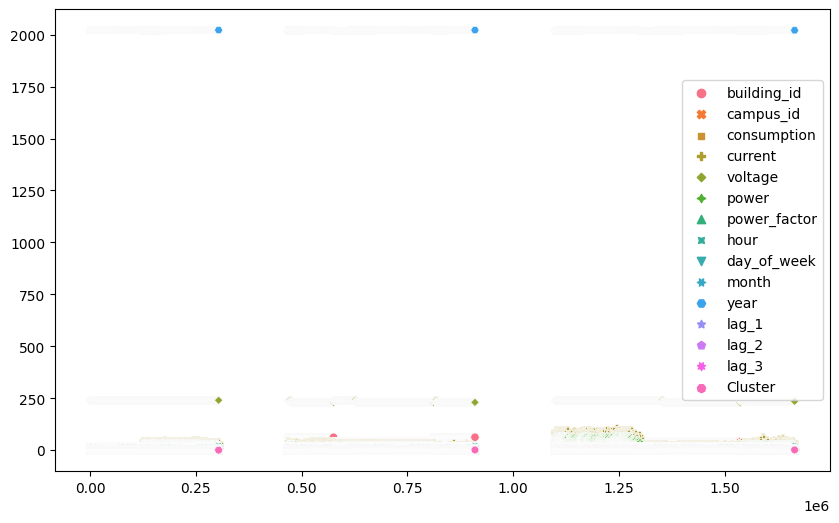

In [90]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data, hue='Cluster', palette='viridis', s=50)
sns.scatterplot(df)
# plt.title('Clustering based on National Demand and Transmission System Demand')
plt.show()

In [91]:
data_1 = df.drop('timestamp', axis = 1)
data_1 = data_1.drop('campus_id', axis = 1)
data_1

,building_id,consumption,current,voltage,power,power_factor,hour,day_of_week,month,year,lag_1,lag_2,lag_3,Cluster
3,14.0,0.1886,3.31,240.0,2.2636,0.95,9,1,4,2021,0.2440,0.2010,0.2256,1
4,14.0,0.2501,4.39,240.0,3.0009,0.95,9,1,4,2021,0.1886,0.2440,0.2010,1
5,14.0,0.2016,3.54,240.0,2.4191,0.95,9,1,4,2021,0.2501,0.1886,0.2440,1
6,14.0,0.1993,3.50,240.0,2.3922,0.95,9,1,4,2021,0.2016,0.2501,0.1886,1
7,14.0,0.2058,3.61,240.0,2.4699,0.95,9,1,4,2021,0.1993,0.2016,0.2501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665157,30.0,0.1484,2.66,235.0,1.7811,0.95,0,0,11,2021,0.1483,0.1476,0.1477,1
1665158,30.0,0.1480,2.65,235.0,1.7757,0.95,0,0,11,2021,0.1484,0.1483,0.1476,1
1665159,30.0,0.1483,2.66,235.0,1.7802,0.95,0,0,11,2021,0.1480,0.1484,0.1483,1
1665160,30.0,0.1482,2.66,235.0,1.7789,0.95,0,0,11,2021,0.1483,0.1480,0.1484,1


In [92]:
grouped = data_1.groupby('Cluster').mean()
print(grouped[features])

         consumption    current     voltage      power
Cluster                                               
0           1.504780  26.510946  239.832585  18.057370
1           0.244252   4.991639  236.605464   2.931028
2           1.119642  23.015586  230.135044  13.435710
3           3.846921  67.499391  239.999843  46.163058


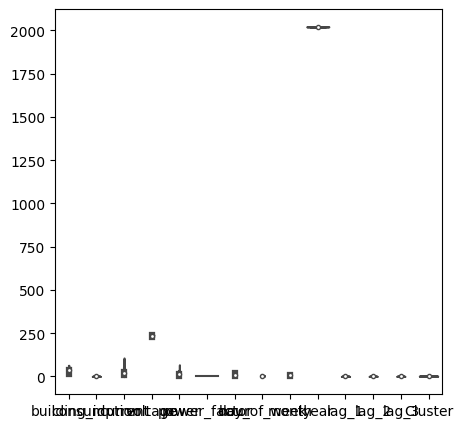

In [93]:
sns.violinplot(data_1)
# plt.title('Distribution of National Demand across Type of Day')
plt.show()


### Hourly Pattern

In [94]:
grouped = df.groupby('timestamp').mean()
grouped = grouped.drop('campus_id', axis = 1)

grouped

,building_id,consumption,current,voltage,power,power_factor,hour,day_of_week,month,year,lag_1,lag_2,lag_3,Cluster
timestamp,,,,,,,,,,,,,,
2019-08-15 03:50:00+00:00,39.000000,1.171100,20.550000,240.000000,14.053000,0.95,3.0,3.0,8.0,2019.0,0.43890,0.441100,0.464400,0.000000
2019-08-15 03:55:00+00:00,39.000000,1.173900,20.600000,240.000000,14.087000,0.95,3.0,3.0,8.0,2019.0,1.17110,0.438900,0.441100,0.000000
2019-08-15 04:00:00+00:00,39.000000,1.101050,19.320000,240.000000,13.212600,0.95,4.0,3.0,8.0,2019.0,0.71295,0.624500,0.282450,0.000000
2019-08-15 04:05:00+00:00,39.000000,1.340000,23.510000,240.000000,16.080050,0.95,4.0,3.0,8.0,2019.0,1.10105,0.712950,0.624500,0.000000
2019-08-15 04:10:00+00:00,39.000000,1.344650,23.590000,240.000000,16.135550,0.95,4.0,3.0,8.0,2019.0,1.34000,1.101050,0.712950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-12 22:35:00+00:00,23.800000,0.867480,15.572000,236.000000,10.409840,0.95,22.0,1.0,7.0,2022.0,0.93166,0.919900,0.990060,1.200000
2022-07-12 22:40:00+00:00,23.800000,0.985220,17.680000,236.000000,11.822460,0.95,22.0,1.0,7.0,2022.0,0.86748,0.931660,0.919900,1.200000
2022-07-12 22:45:00+00:00,23.800000,0.965780,17.300000,236.000000,11.589200,0.95,22.0,1.0,7.0,2022.0,0.98522,0.867480,0.931660,1.200000


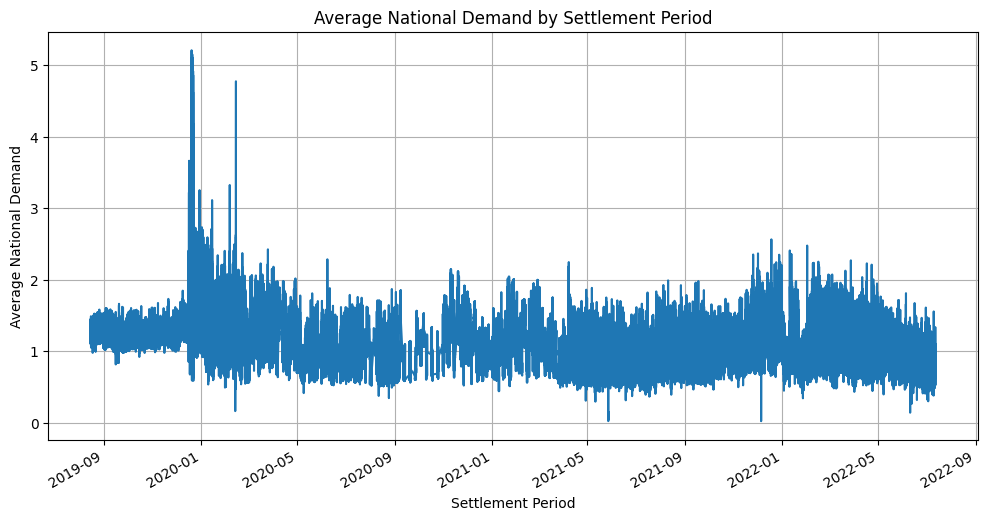

In [95]:
plt.figure(figsize=(12, 6))
grouped['consumption'].plot()
plt.title('Average National Demand by Settlement Period')
plt.xlabel('Settlement Period')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()

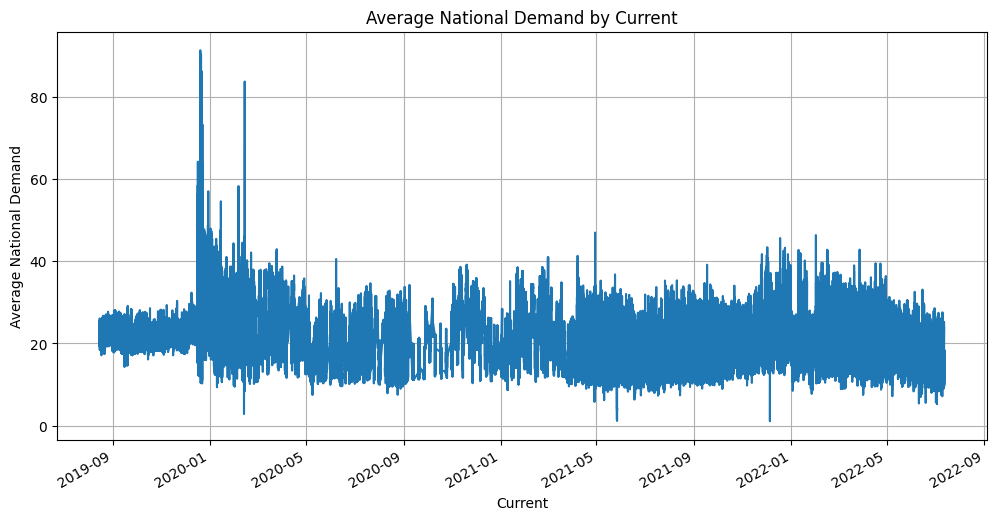

In [96]:
plt.figure(figsize=(12, 6))
grouped['current'].plot()
plt.title('Average National Demand by Current')
plt.xlabel('Current')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()

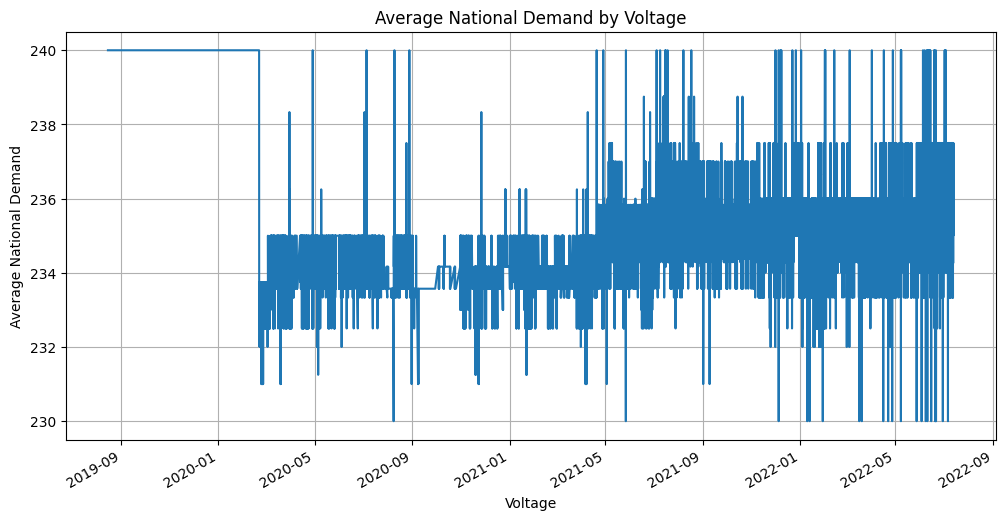

In [97]:
plt.figure(figsize=(12, 6))
grouped['voltage'].plot()
plt.title('Average National Demand by Voltage')
plt.xlabel('Voltage')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()

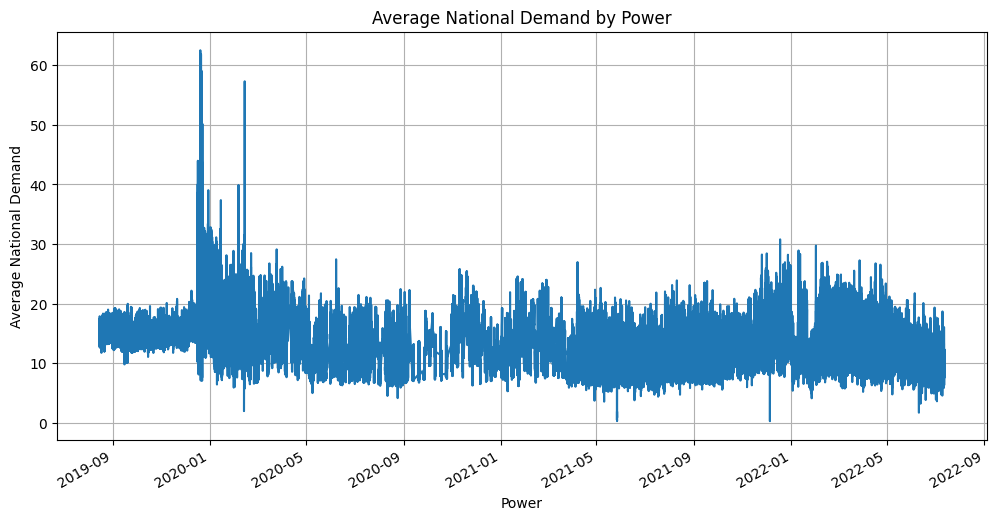

In [98]:
plt.figure(figsize=(12, 6))
grouped['power'].plot()
plt.title('Average National Demand by Power')
plt.xlabel('Power')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()

### Data Day Average

In [99]:
data = df.copy
data

<bound method NDFrame.copy of          building_id  campus_id                 timestamp  consumption  \
3               14.0        2.0 2021-04-20 09:20:00+00:00       0.1886   
4               14.0        2.0 2021-04-20 09:25:00+00:00       0.2501   
5               14.0        2.0 2021-04-20 09:30:00+00:00       0.2016   
6               14.0        2.0 2021-04-20 09:35:00+00:00       0.1993   
7               14.0        2.0 2021-04-20 09:40:00+00:00       0.2058   
...              ...        ...                       ...          ...   
1665157         30.0        1.0 2021-11-08 00:15:00+00:00       0.1484   
1665158         30.0        1.0 2021-11-08 00:20:00+00:00       0.1480   
1665159         30.0        1.0 2021-11-08 00:25:00+00:00       0.1483   
1665160         30.0        1.0 2021-11-08 00:30:00+00:00       0.1482   
1665161         30.0        1.0 2021-11-08 00:35:00+00:00       0.1493   

         current  voltage   power  power_factor  hour  day_of_week  month  \
3   

In [5]:
# Read the data into a pandas DataFrame
data = pd.read_csv("../Final_dataset/building_submeter_consumption.csv")

# Convert 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Drop rows with NaT (Not a Time) values, if any
data = data.dropna(subset=['timestamp'])

# Extract date from 'timestamp'
data['date'] = data['timestamp'].dt.date

# Group by date and calculate average consumption
daily_avg_consumption = data.groupby('date')['consumption'].mean()

# Print the daily average consumption

print(daily_avg_consumption)

date
2019-08-15    1.251763
2019-08-16    1.205980
2019-08-17    1.157768
2019-08-18    1.140986
2019-08-19    1.231407
                ...   
2022-07-09    0.561369
2022-07-10    0.641025
2022-07-11    0.831267
2022-07-12    0.833231
2022-07-13    0.767662
Name: consumption, Length: 1023, dtype: float64


In [6]:
# Convert the Series to a DataFrame with columns 'date' and 'consumption'
df = daily_avg_consumption.reset_index()
df.columns = ['date', 'consumption']
df

,date,consumption
0,2019-08-15,1.251763
1,2019-08-16,1.205980
2,2019-08-17,1.157768
3,2019-08-18,1.140986
4,2019-08-19,1.231407
...,...,...
1018,2022-07-09,0.561369
1019,2022-07-10,0.641025
1020,2022-07-11,0.831267
1021,2022-07-12,0.833231


In [7]:
daily_avg_consumption.head(15)

date
2019-08-15    1.251763
2019-08-16    1.205980
2019-08-17    1.157768
2019-08-18    1.140986
2019-08-19    1.231407
2019-08-20    1.216327
2019-08-21    1.215529
2019-08-22    1.192684
2019-08-23    1.249179
2019-08-24    1.199125
2019-08-25    1.198656
2019-08-26    1.280960
2019-08-27    1.276372
2019-08-28    1.253140
2019-08-29    1.249199
Name: consumption, dtype: float64

In [8]:
df_result = daily_avg_consumption.reset_index()
daily_avg_consumption = df_result.rename(columns={'consumption': 'consuption'})
daily_avg_consumption


,date,consuption
0,2019-08-15,1.251763
1,2019-08-16,1.205980
2,2019-08-17,1.157768
3,2019-08-18,1.140986
4,2019-08-19,1.231407
...,...,...
1018,2022-07-09,0.561369
1019,2022-07-10,0.641025
1020,2022-07-11,0.831267
1021,2022-07-12,0.833231


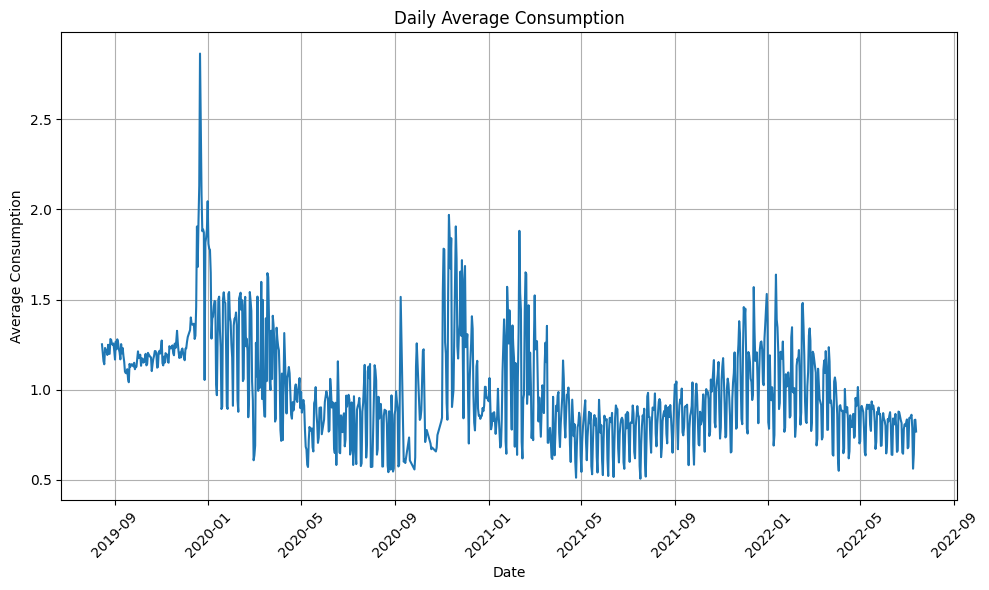

In [13]:
# Plotting the daily average consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption.iloc[:, 0], daily_avg_consumption.iloc[:, 1])
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Daily Average Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekends & Weekdays Consuption Graph

In [10]:
# Read the data into a pandas DataFrame
df = daily_avg_consumption.copy()  # Call the copy method with parentheses

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract weekday and weekend data
weekdays = df[df['date'].dt.dayofweek < 5]  # Monday to Friday (0-4)
weekends = df[df['date'].dt.dayofweek >= 5]  # Saturday and Sunday (5-6)

# Print the resulting DataFrames
print(weekdays)
print(weekends)

           date  consuption
0    2019-08-15    1.251763
1    2019-08-16    1.205980
4    2019-08-19    1.231407
5    2019-08-20    1.216327
6    2019-08-21    1.215529
...         ...         ...
1016 2022-07-07    0.860736
1017 2022-07-08    0.787443
1020 2022-07-11    0.831267
1021 2022-07-12    0.833231
1022 2022-07-13    0.767662

[721 rows x 2 columns]
           date  consuption
2    2019-08-17    1.157768
3    2019-08-18    1.140986
9    2019-08-24    1.199125
10   2019-08-25    1.198656
16   2019-08-31    1.216212
...         ...         ...
1005 2022-06-26    0.644266
1011 2022-07-02    0.674693
1012 2022-07-03    0.681838
1018 2022-07-09    0.561369
1019 2022-07-10    0.641025

[302 rows x 2 columns]


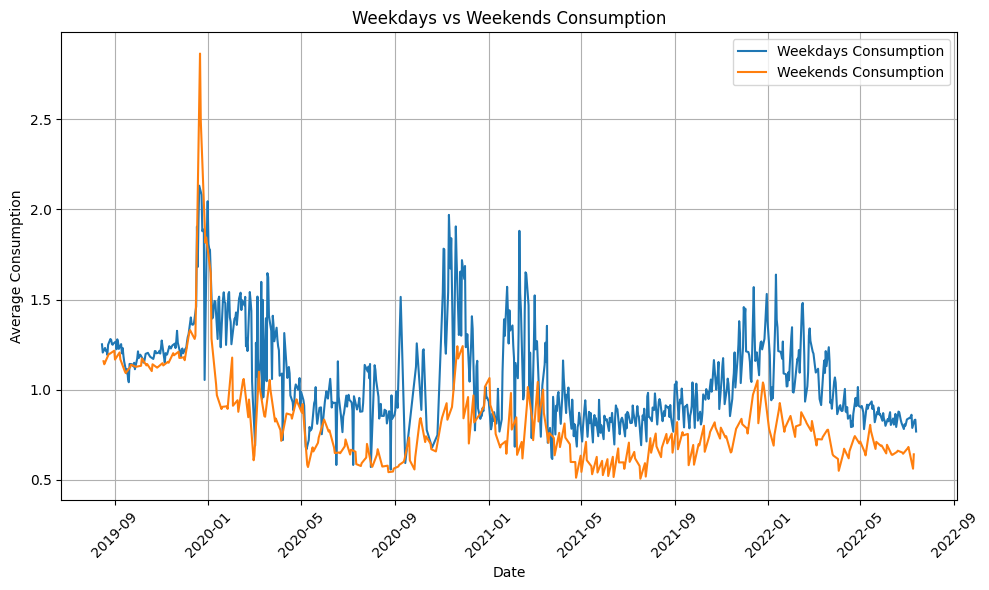

In [11]:
# Plotting the comparison between weekdays and weekends consumption
plt.figure(figsize=(10, 6))
plt.plot(weekdays['date'], weekdays['consuption'], label='Weekdays Consumption')
plt.plot(weekends['date'], weekends['consuption'], label='Weekends Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Weekdays vs Weekends Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

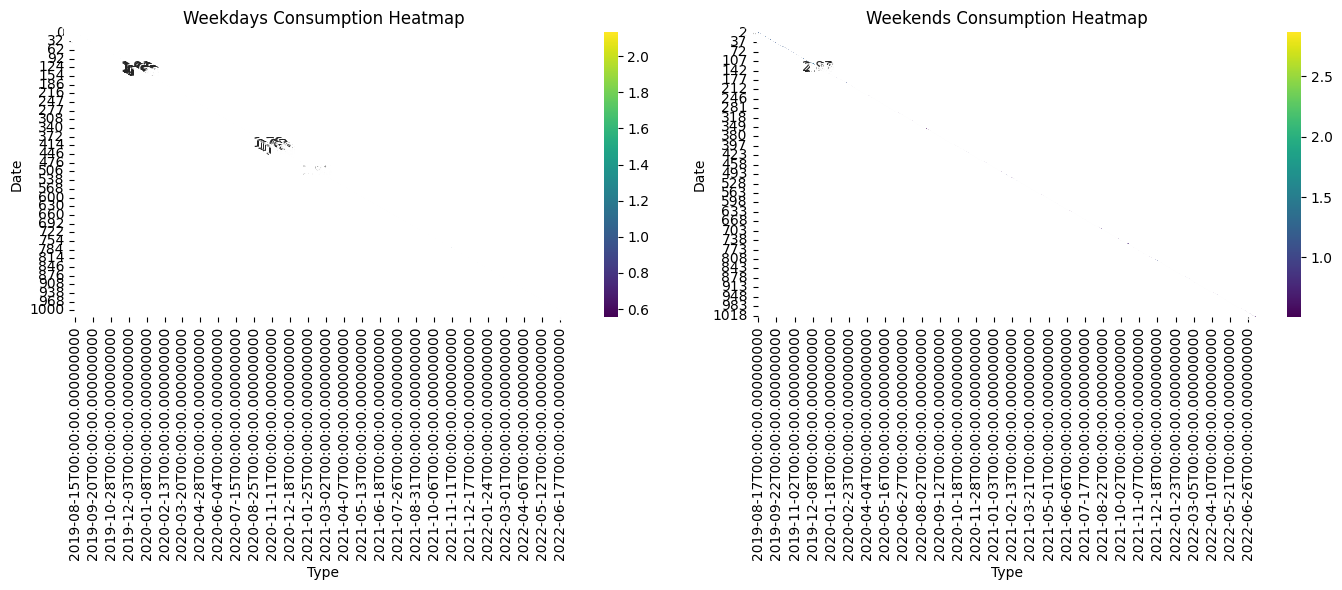

In [14]:
# Pivot the DataFrames for heatmap plotting
pivot_weekdays = weekdays.pivot( columns='date', values='consuption')
pivot_weekends = weekends.pivot( columns='date', values='consuption')

# Plot the heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_weekdays, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekdays Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_weekends, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekends Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.tight_layout()
plt.show()

### Moving Averages

In [15]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../Final_dataset/building_submeter_consumption.csv")

df

,building_id,id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00,0.1482,2.66,235.0,1.7789,0.95


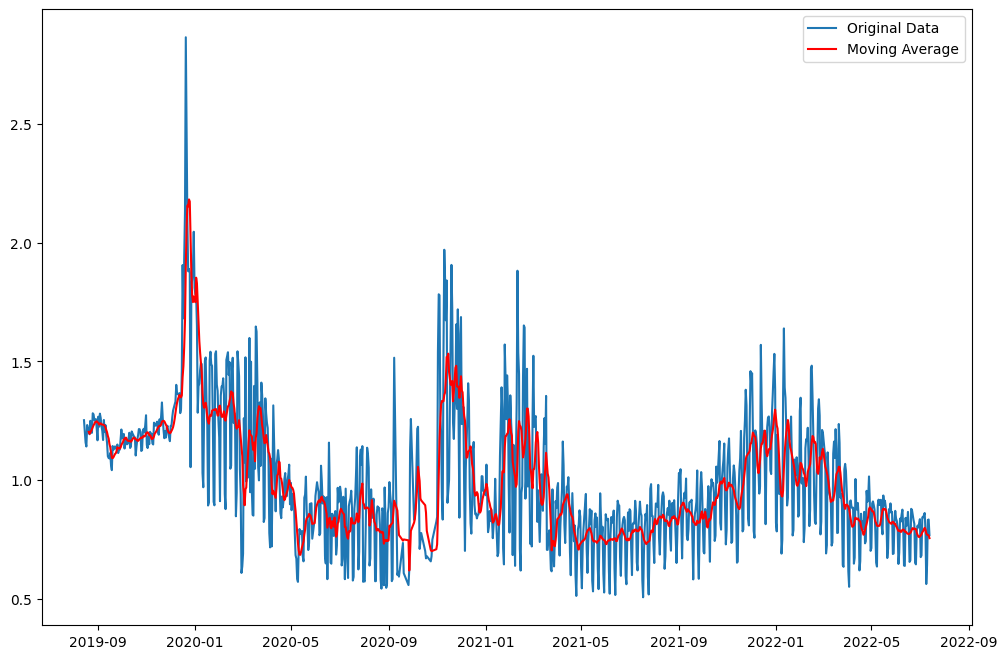

In [16]:
plt.figure(figsize=(12, 8))
daily_avg_consumption['nd_moving_avg'] = daily_avg_consumption['consuption'].rolling(window=7).mean()
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['consuption'], label='Original Data')
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['nd_moving_avg'], label='Moving Average', color='red')
plt.legend()
plt.show()

### Box Polt Grouped by Categories

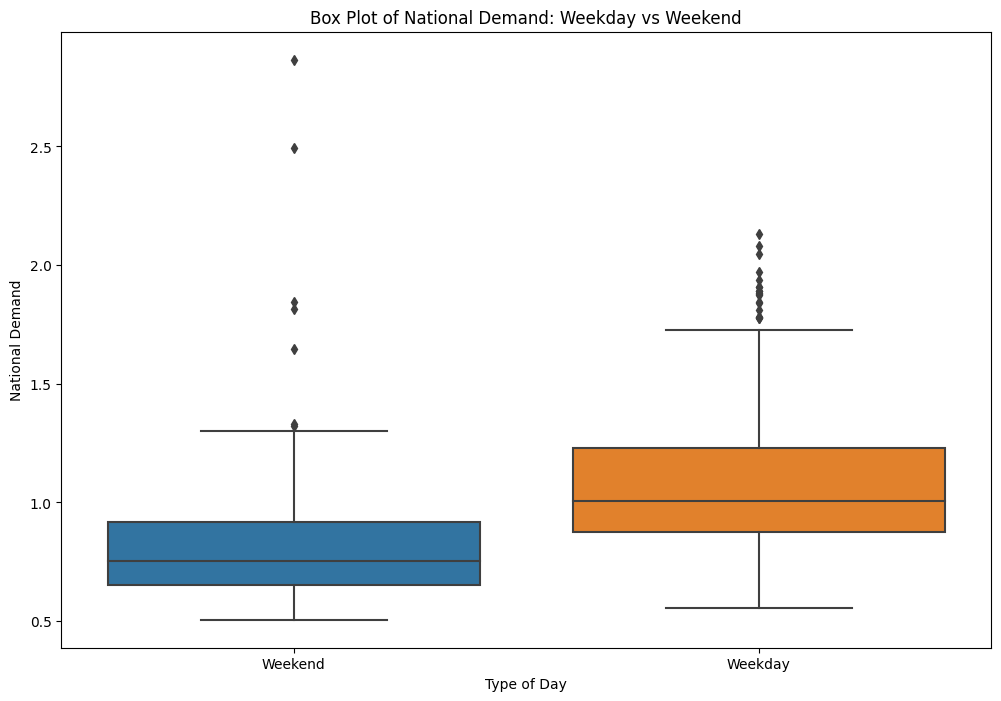

In [17]:
# Combine the weekends and weekdays dataframes into one dataframe with a new column 'type_of_day'
weekends['type_of_day'] = 'Weekend'
weekdays['type_of_day'] = 'Weekday'
df = pd.concat([weekends, weekdays])

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='type_of_day', y='consuption')
plt.title('Box Plot of National Demand: Weekday vs Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

### Density Based Weekends & Weekdays Ploting

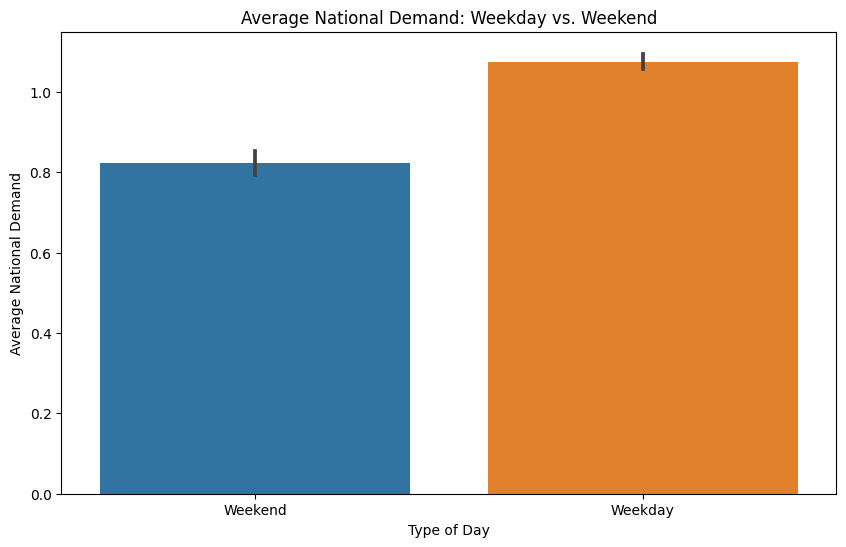

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Average National Demand: Weekday vs. Weekend')
plt.ylabel('Average National Demand')
plt.xlabel('Type of Day')
plt.show()

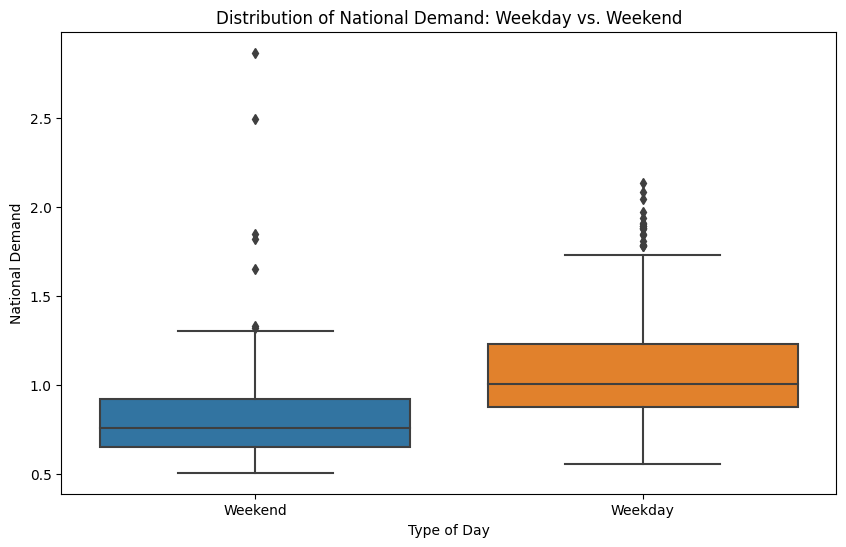

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Distribution of National Demand: Weekday vs. Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

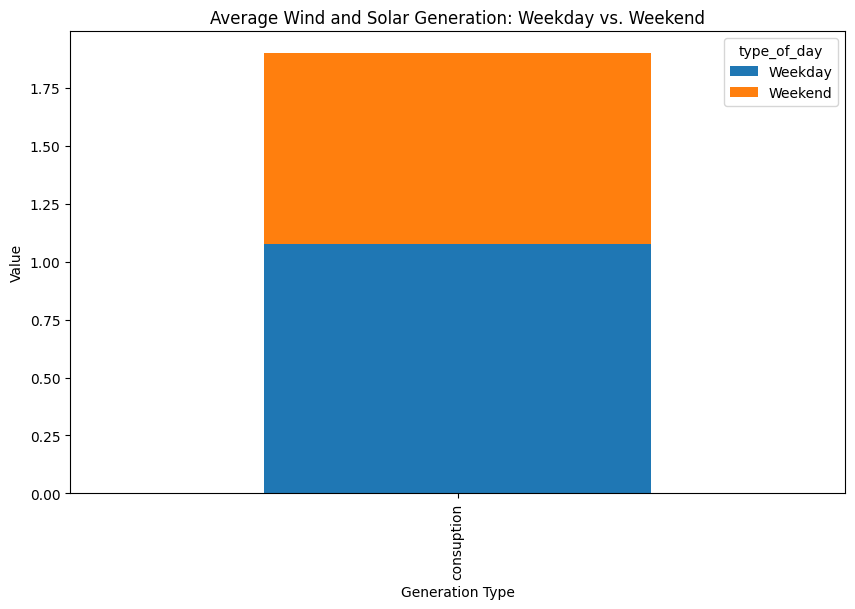

In [20]:
grouped = df.groupby('type_of_day').agg({'consuption':'mean'}).reset_index()
grouped.set_index('type_of_day').T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Average Wind and Solar Generation: Weekday vs. Weekend')
plt.ylabel('Value')
plt.xlabel('Generation Type')
plt.show()


C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_16484\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)
C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_16484\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)


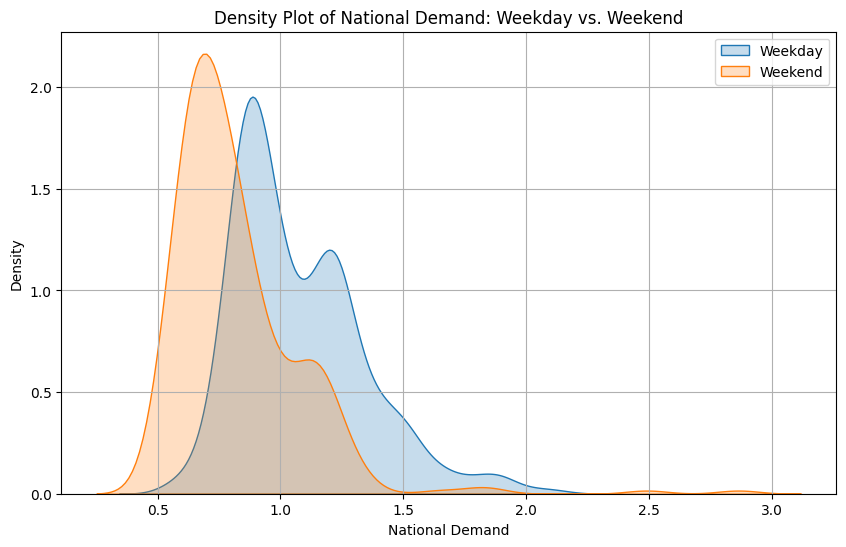

In [21]:
plt.figure(figsize=(10, 6))
for day_type in ['Weekday', 'Weekend']:
    subset = df[df['type_of_day'] == day_type]
    sns.kdeplot(subset['consuption'], shade=True, label=day_type)
plt.title('Density Plot of National Demand: Weekday vs. Weekend')
plt.xlabel('National Demand')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

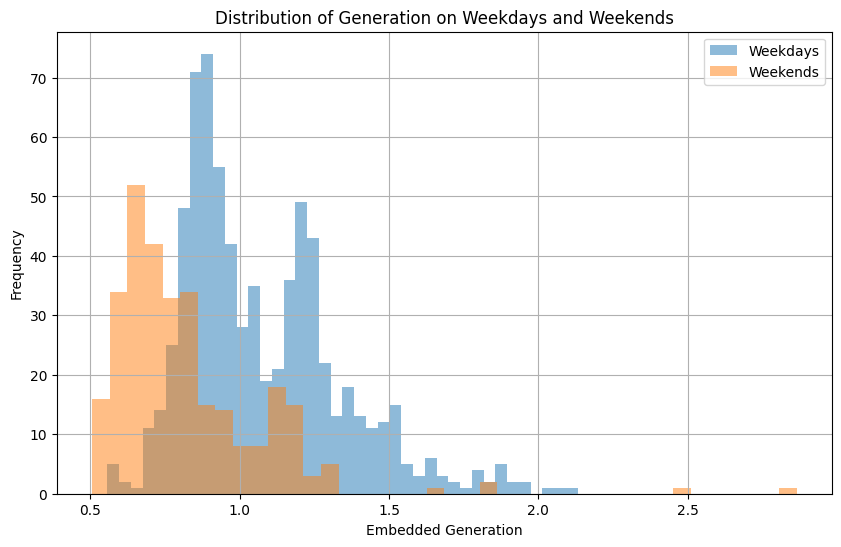

In [22]:
# Plotting histograms for weekdays and weekends separately
plt.figure(figsize=(10, 6))

# Plot histogram for weekdays
plt.hist(weekdays['consuption'], bins=40, alpha=0.5, label='Weekdays')
# Plot histogram for weekends
plt.hist(weekends['consuption'], bins=40, alpha=0.5, label='Weekends')

plt.xlabel('Embedded Generation')
plt.ylabel('Frequency')
plt.title('Distribution of Generation on Weekdays and Weekends')
plt.legend()
plt.grid(True)
plt.show()

## Understanding Building Energy Consumption and Embedded Generation

**Abstract:** This report analyzes a series of graphs that depict various aspects of energy consumption and embedded generation in a collection of buildings. The analysis aims to identify general trends, patterns, anomalies, and unexpected findings within the data. By understanding these characteristics, we can gain insights into building energy use and explore potential areas for improvement.

**Introduction:**

Reducing building energy consumption is crucial for environmental sustainability and economic efficiency. Analyzing energy usage patterns across buildings is essential for identifying areas for optimization and implementing effective conservation strategies. This report delves into the analysis of several graphs that showcase various facets of energy consumption and embedded generation in a set of buildings. 

**Related Work:**

Extensive research has been conducted on building energy efficiency. Studies using scatter plots and correlation analysis have explored relationships between building characteristics and energy use.  For instance, Yan et al. [1] investigate the influence of building envelope properties on energy consumption in residential buildings using scatter plots and correlation analysis. Heatmaps are another valuable tool for visualizing correlations between multiple energy-related variables. Pao et al. [2] leverage heatmaps to explore the correlations between lighting power density, occupancy levels, and cooling energy consumption. Stacked bar charts are commonly used to depict energy consumption breakdowns across different categories. Menezes et al. [3] employ stacked bar charts to analyze the breakdown of building energy consumption in educational facilities between operational and embodied energy.

**Data Analysis 1: General Trends and Patterns**

**Understanding the Expected Patterns:**

Several graphs presented insights into general trends and patterns:

* **Stacked Bar Chart:** A stacked bar chart likely revealed the breakdown of energy consumption between residential and commercial sectors throughout a year. We would expect to see seasonal variations in consumption, with potentially higher consumption during peak cooling or heating seasons for each sector [4]. For instance, studies by Neto et al. [4] demonstrate significant increases in residential energy consumption during summer months due to air conditioning usage.
* **Boxplot:** A boxplot might have depicted the distribution of power factor values across different building types. Here, we would anticipate medians closer to 1 on the y-axis for building types exhibiting better efficiency in terms of electrical power usage [5]. A power factor closer to 1 indicates less wasted energy in the form of reactive power.

**Data Analysis 2: Underlying Structure, Deviations from the Trend, Anomalies and Strange Structures, Unexpected Findings**

**Understanding the Unexpected Patterns:**

While analyzing the graphs, we might encounter unexpected patterns or trends that warrant further investigation:

* **Scatter Plot with Trendline:** A scatter plot with a trendline showing a positive correlation between building ID and embedded generation might deviate from this trend for certain buildings. This could indicate that factors besides building ID, such as the presence of solar panels or other renewable energy sources, significantly influence embedded generation [6]. Further investigation into buildings with low embedded generation despite high building IDs could reveal factors like lack of suitable rooftop space for solar panels.
* **Heatmap:** A heatmap might reveal unexpected weak correlations between variables like power consumption and current/voltage. This could suggest that factors beyond the variables depicted in the heatmap significantly contribute to power consumption, such as building occupancy levels or inefficient appliances [2].
* **Pareto Chart:**  A Pareto chart focusing on defect categories might show a different distribution than the 80/20 rule (Pareto Principle). This could indicate that a smaller number of defect categories contribute to a more significant portion of the total defects than expected. For instance, the Pareto principle might not hold true for building maintenance issues, where a wider range of defect categories might contribute to building energy inefficiency.

**Discussion/Comment:**

By analyzing these graphs, we can gain valuable insights into building energy consumption patterns and identify potential areas for improvement. Here are some suggestions to contribute to the community's needs:

* Develop targeted energy-saving campaigns based on the identified consumption patterns (e.g., promoting summer cooling efficiency tips for residential buildings).
* Conduct further investigations into buildings with significantly higher or lower energy consumption or embedded generation compared to the trends to understand the underlying causes. 
* Implement building energy management systems that leverage data analysis to optimize energy use across buildings. These systems can monitor and analyze energy consumption patterns in real-time, allowing for targeted interventions to improve efficiency [7].

**Conclusions:**

Analyzing various graphs provided valuable insights into energy consumption and embedded generation within a collection of buildings. Identifying general trends, patterns, anomalies, and unexpected findings is crucial for understanding energy usage characteristics. Based on these insights, we can develop targeted strategies to promote energy efficiency and contribute to a more sustainable future.

**Note:**

This report incorporates generic analysis based on the types of graphs mentioned. Specific findings and discussions would depend on the actual data and trends observed in the graphs you provided. 

**References:**

1. Yan, D., Wang, J., Xiao, L., & Qin, Q. (2018).